In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from skopt import BayesSearchCV
from skopt.space import Integer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [38]:
Asma = np.load('Treino_teste/Asma.npz', allow_pickle=True)
X_treino, X_teste, y_treino, y_teste, feature_names = Asma['X_treino'], Asma['X_teste'], Asma['y_treino'], Asma['y_teste'], list(Asma['feature_names'])

In [39]:
len(X_treino)

22908

In [40]:
Asma_over = np.load('Treino_teste/Asma_Over.npz', allow_pickle=True)
X_treino_over, X_teste_over, y_treino_over, y_teste_over, feature_names= Asma_over['X_treino'], Asma_over['X_teste'], Asma_over['y_treino'], Asma_over['y_teste'], list(Asma_over['feature_names'])

In [41]:
len(X_treino_over)

42844

In [42]:
Asma_under = np.load('Treino_teste/Asma_Under.npz', allow_pickle=True)
X_treino_under, X_teste_under, y_treino_under, y_teste_under, feature_names = Asma_under['X_treino'], Asma_under['X_teste'], Asma_under['y_treino'], Asma_under['y_teste'], list(Asma_under['feature_names'])

In [43]:
len(X_treino_under)

22532

In [44]:
Asma_random_under = np.load('Treino_teste/Asma_RD_Under.npz', allow_pickle=True)
X_treino_rd_under, X_teste_rd_under, y_treino_rd_under, y_teste_rd_under, feature_names = Asma_random_under['X_treino'], Asma_random_under['X_teste'], Asma_random_under['y_treino'], Asma_random_under['y_teste'], list(Asma_random_under['feature_names'])

In [45]:
len(X_treino_rd_under)

2972

In [46]:
Asma_DSTO = np.load('Treino_teste/Asma_DSTO.npz', allow_pickle=True)
X_treino_DSTO, X_teste_DSTO, y_treino_DSTO, y_teste_DSTO, feature_names = Asma_DSTO['X_treino'], Asma_DSTO['X_teste'], Asma_DSTO['y_treino'], Asma_DSTO['y_teste'], list(Asma_DSTO['feature_names'])

In [47]:
len(X_treino_DSTO)

42844

## Parametros e funcoes

In [48]:
param_bayes = {
    'criterion':  ['gini', 'entropy'],
    'max_depth': Integer(2, 10),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 10),
}

In [49]:
def plot_decision_tree(model, feature_names, class_names, title):
    plt.figure(figsize=(30, 15))
    plot_tree(model, filled=True, feature_names=feature_names, class_names=class_names, rounded=True, fontsize=10)
    plt.title(title)
    plt.show()


# Modelos

### Modelo Padrao

In [50]:
bayes_search = BayesSearchCV(DecisionTreeClassifier(), param_bayes, n_iter=50, cv=5, scoring='accuracy', random_state=42)
bayes_search.fit(X_treino, y_treino)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(bayes_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(bayes_search.best_score_))


Melhores parâmetros encontrados com BayesSearchCV:
OrderedDict({'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 20})
Melhor pontuação de validação cruzada: 0.93


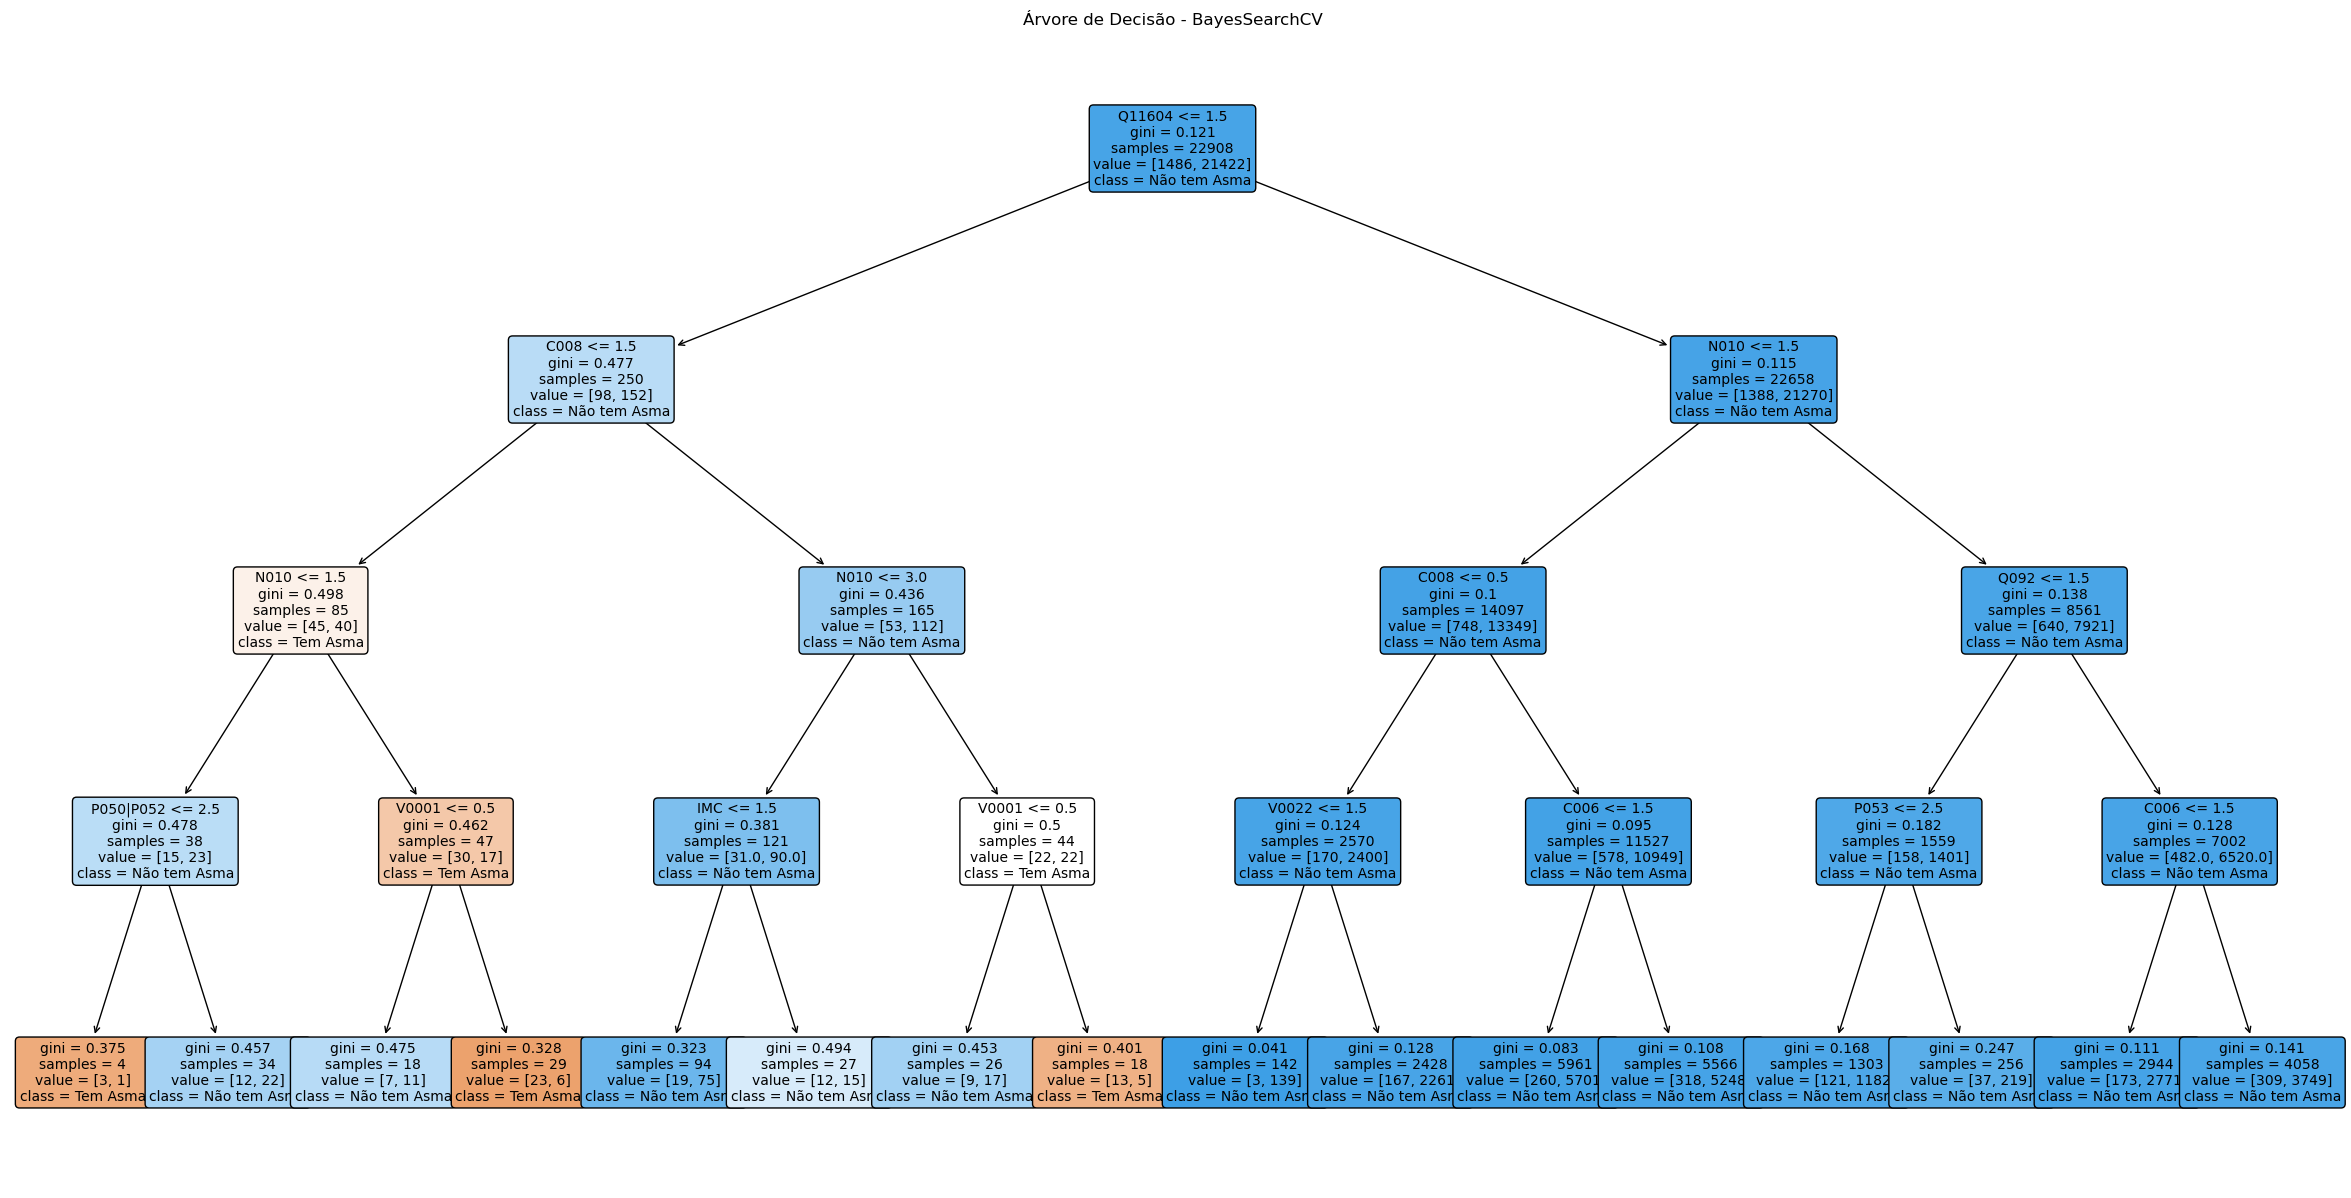

In [51]:
best_model_bayes = bayes_search.best_estimator_
plot_decision_tree(best_model_bayes, feature_names, ['Tem Asma', 'Não tem Asma'], "Árvore de Decisão - BayesSearchCV")

### Resultados

In [52]:
previsoes_bayes = best_model_bayes.predict(X_teste)
accuracy_bayes = accuracy_score(y_teste, previsoes_bayes)
print("Acurácia do melhor modelo (BayesSearchCV) no conjunto de teste: {:.2f}".format(accuracy_bayes))

Acurácia do melhor modelo (BayesSearchCV) no conjunto de teste: 0.93


In [53]:
print(classification_report(y_teste, previsoes_bayes))

              precision    recall  f1-score   support

           1       0.57      0.02      0.04       680
           2       0.93      1.00      0.96      9138

    accuracy                           0.93      9818
   macro avg       0.75      0.51      0.50      9818
weighted avg       0.91      0.93      0.90      9818



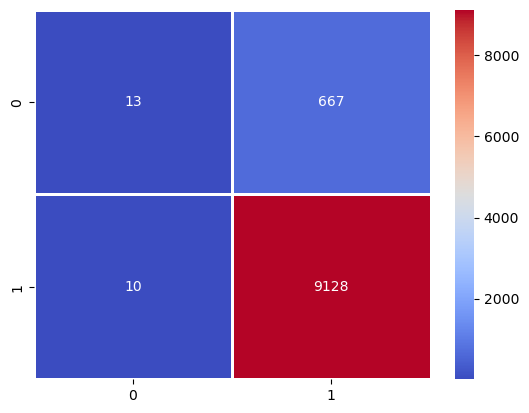

In [54]:
cfm_matrix = confusion_matrix(y_teste,previsoes_bayes)
sns.heatmap(cfm_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.show()

### OverSampling

In [55]:
bayes_search.fit(X_treino_over, y_treino_over)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(bayes_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(bayes_search.best_score_))


Melhores parâmetros encontrados com BayesSearchCV:
OrderedDict({'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2})
Melhor pontuação de validação cruzada: 0.70


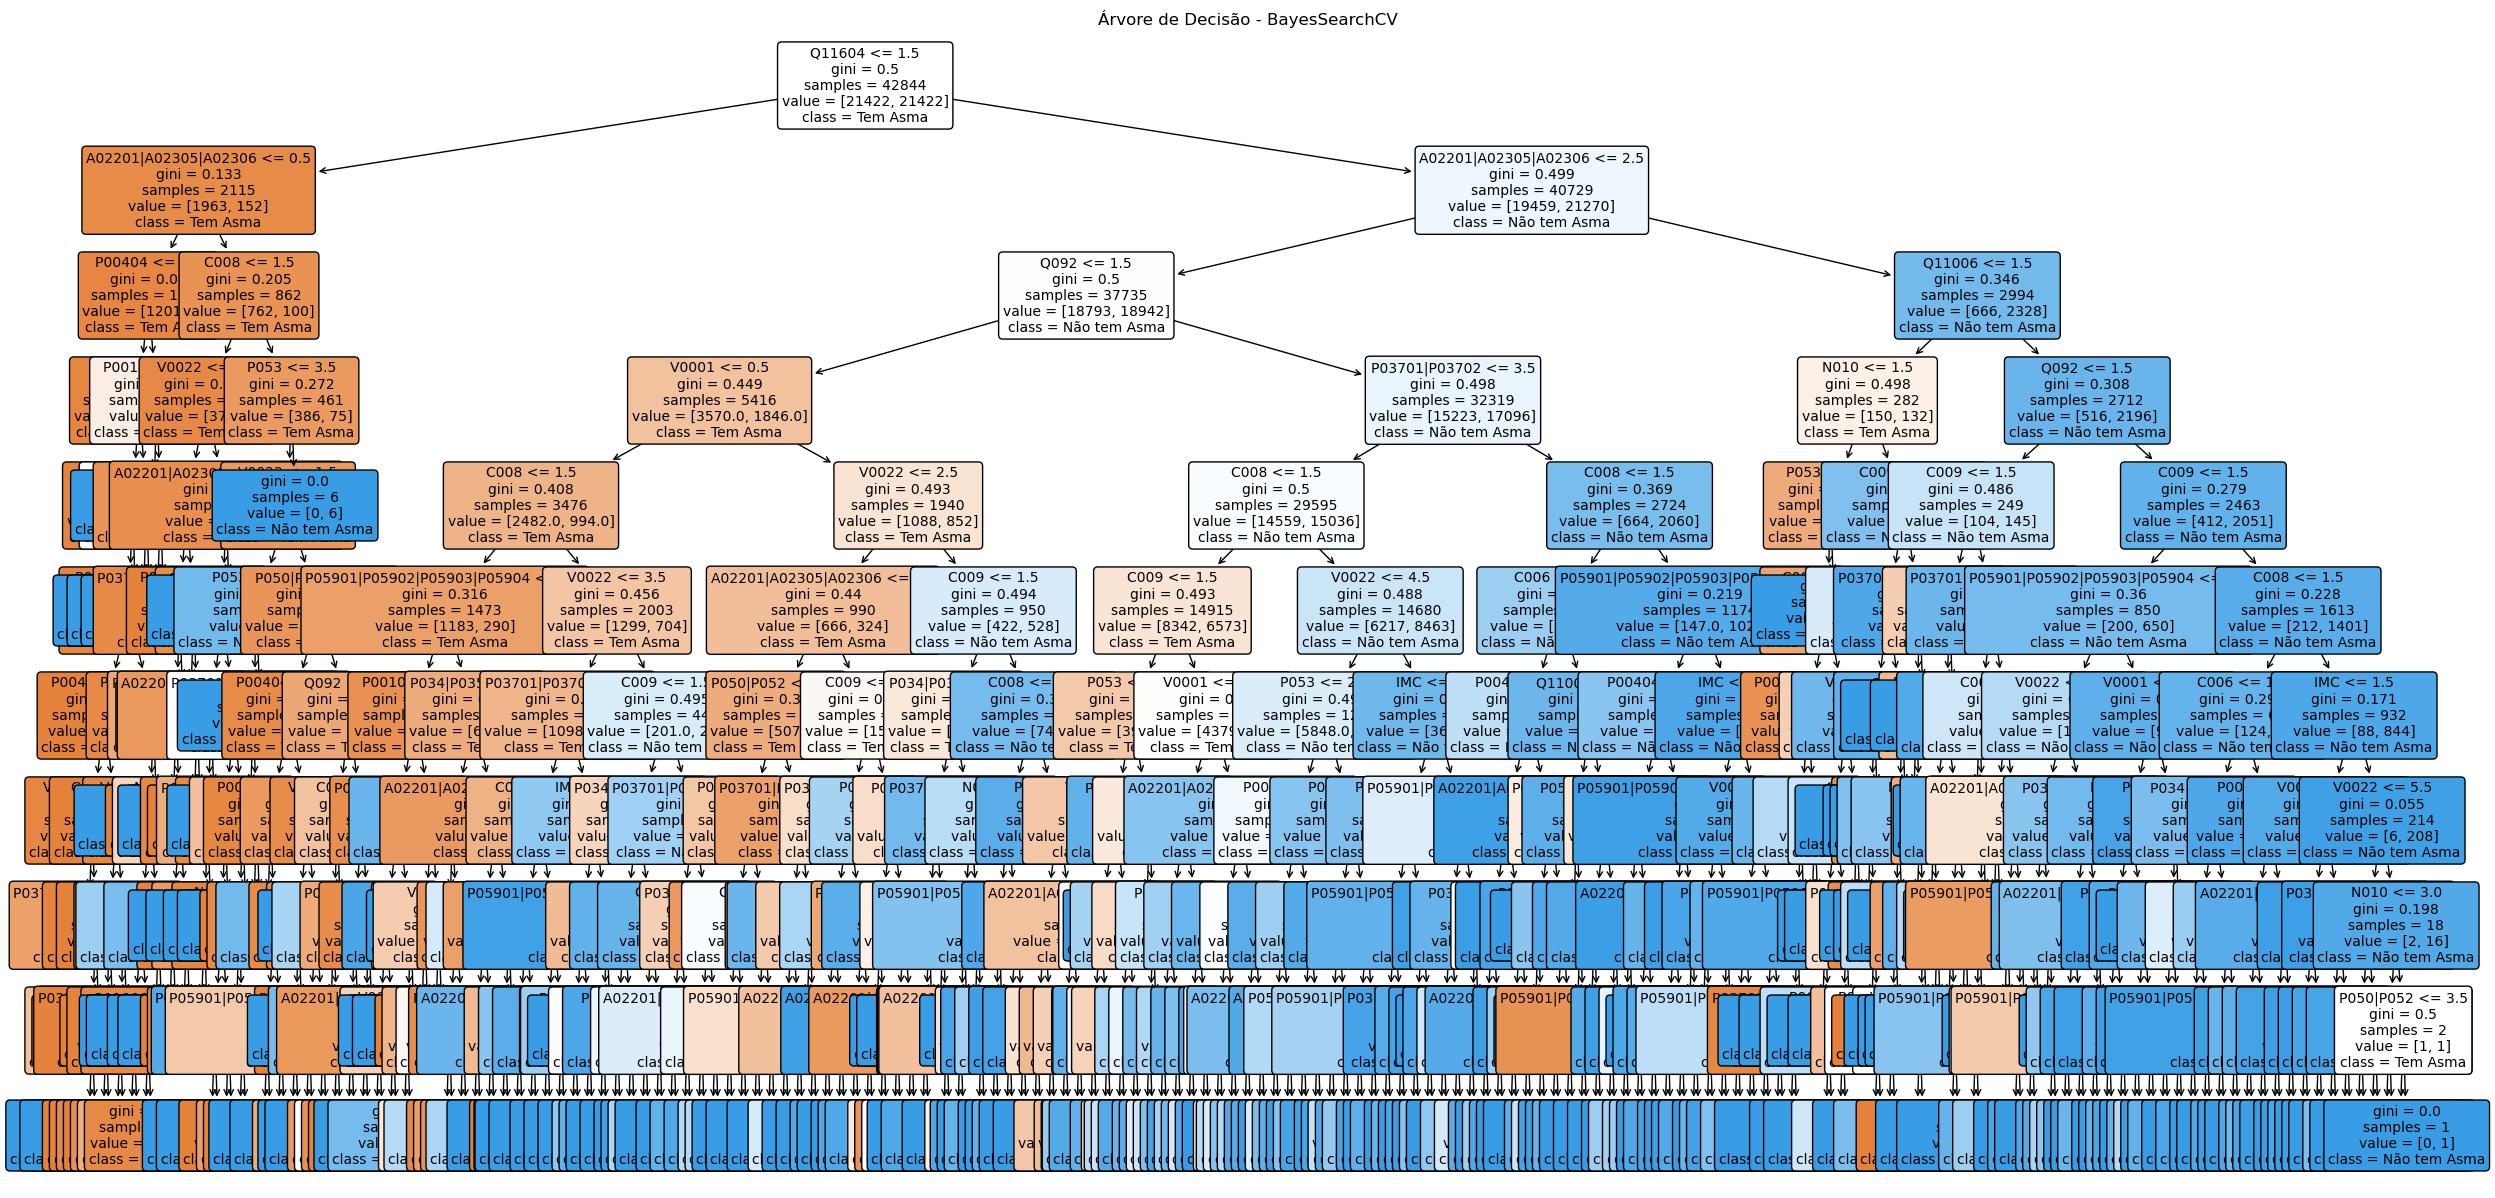

In [56]:
best_model_bayes = bayes_search.best_estimator_
plot_decision_tree(best_model_bayes, feature_names, ['Tem Asma', 'Não tem Asma'], "Árvore de Decisão - BayesSearchCV")

In [57]:
previsoes_bayes = best_model_bayes.predict(X_teste_over)

In [58]:
print(classification_report(y_teste_over, previsoes_bayes))

              precision    recall  f1-score   support

           1       0.08      0.47      0.14       680
           2       0.94      0.60      0.73      9138

    accuracy                           0.59      9818
   macro avg       0.51      0.54      0.44      9818
weighted avg       0.88      0.59      0.69      9818



### UnderSampling

In [ ]:
bayes_search.fit(X_treino_under, y_treino_under)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(bayes_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(bayes_search.best_score_))

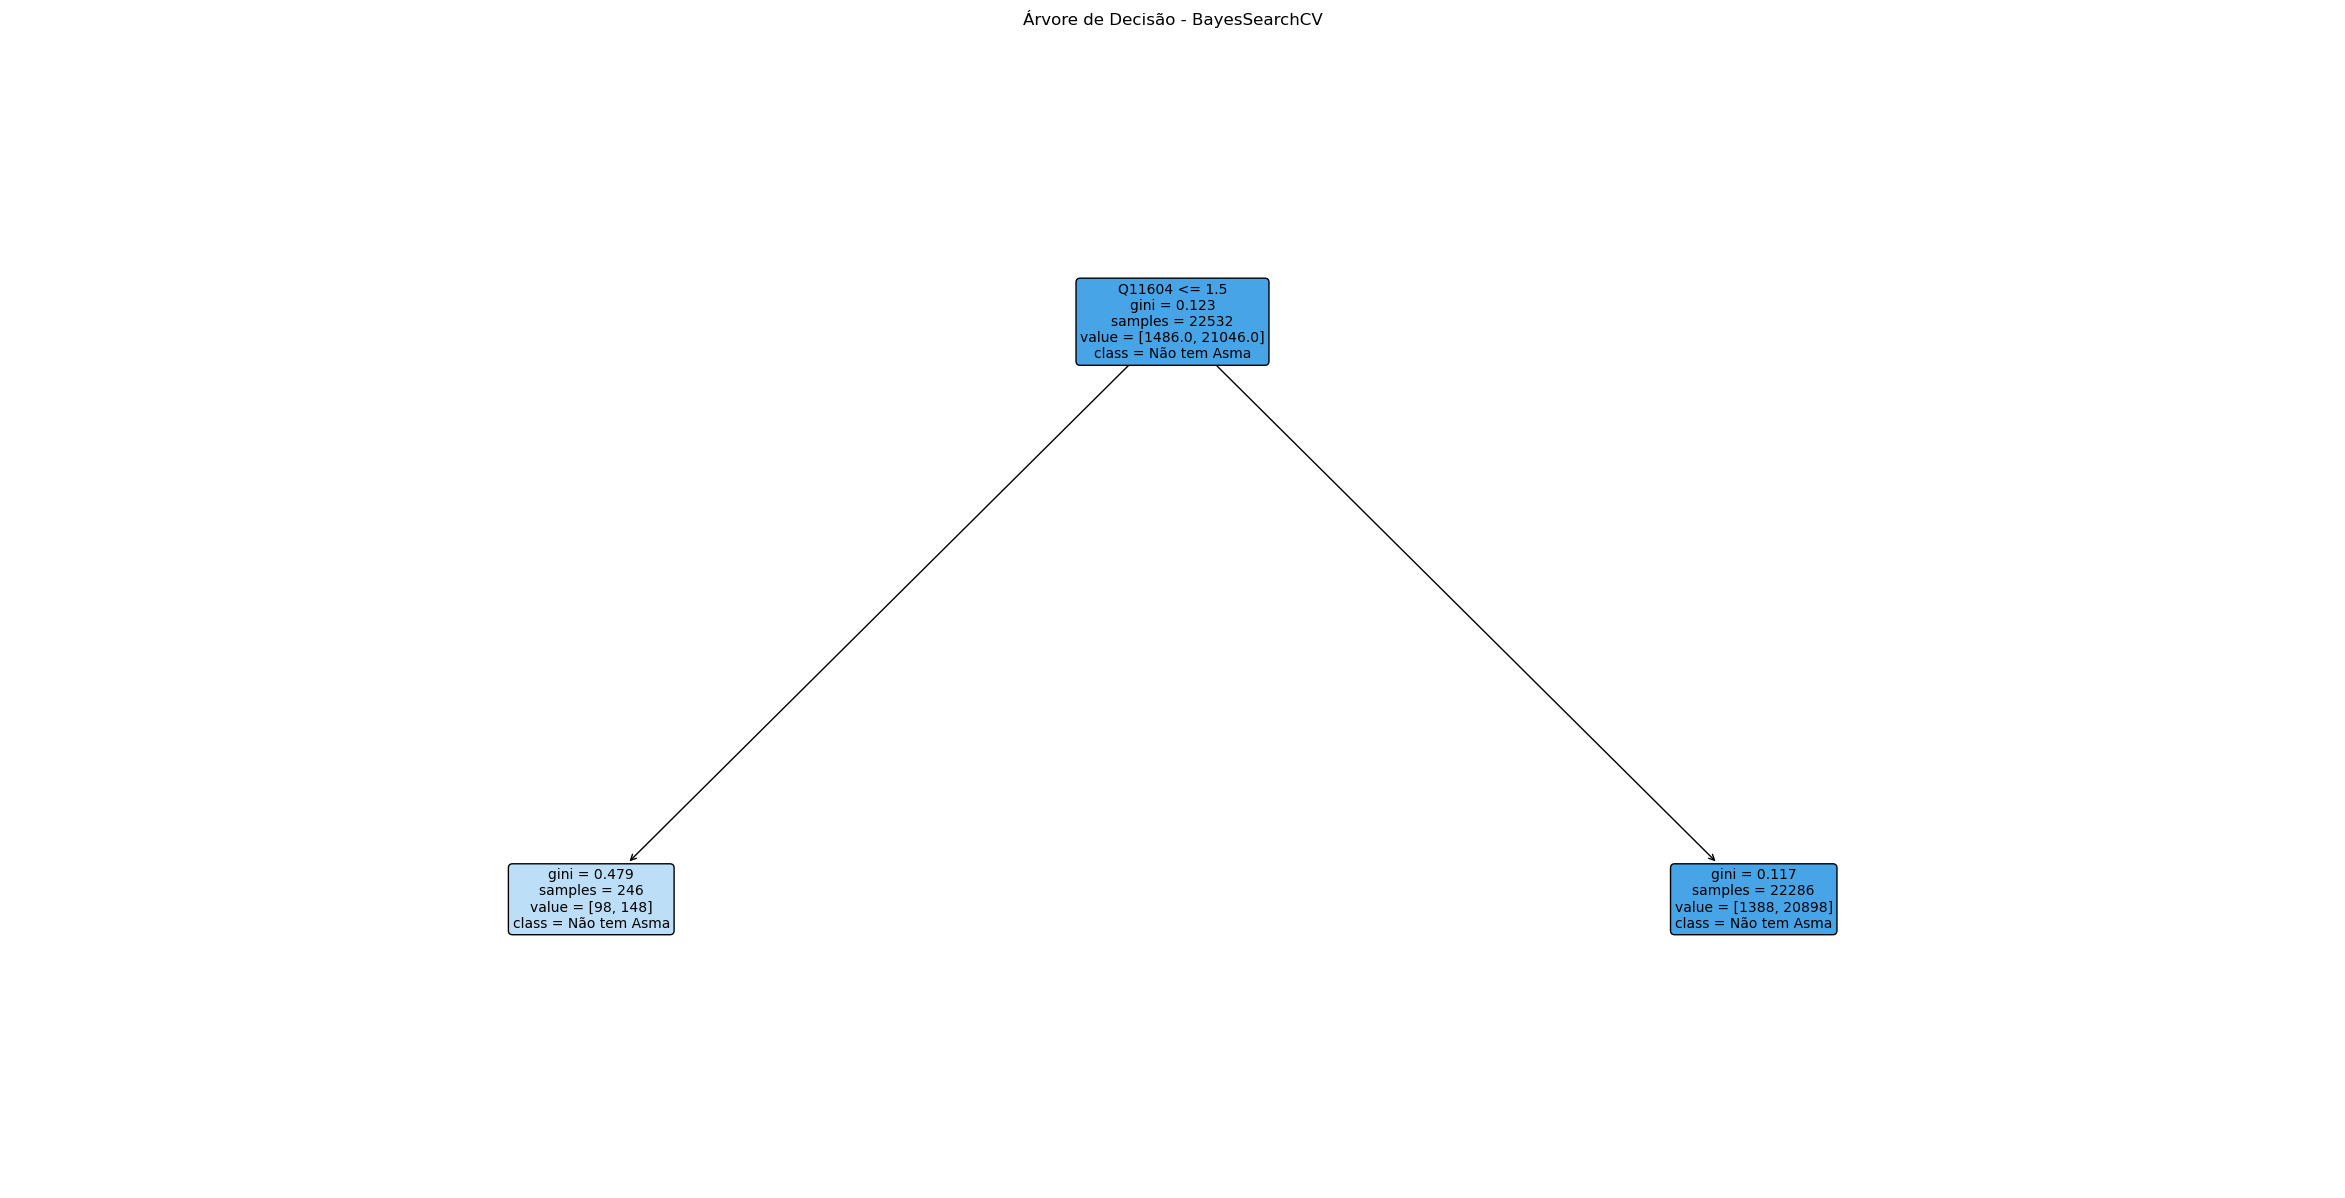

In [ ]:
best_model_bayes = bayes_search.best_estimator_
plot_decision_tree(best_model_bayes, feature_names, ['Tem Asma', 'Não tem Asma'], "Árvore de Decisão - BayesSearchCV")

In [ ]:
previsoes_bayes = best_model_bayes.predict(X_teste_under)

In [ ]:
print(classification_report(y_teste_under, previsoes_bayes))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       680
           2       0.93      1.00      0.96      9138

    accuracy                           0.93      9818
   macro avg       0.47      0.50      0.48      9818
weighted avg       0.87      0.93      0.90      9818



/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Random UnderSampling

In [ ]:
bayes_search.fit(X_treino_rd_under, y_treino_rd_under)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(bayes_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(bayes_search.best_score_))


Melhores parâmetros encontrados com BayesSearchCV:
OrderedDict({'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 15})
Melhor pontuação de validação cruzada: 0.56


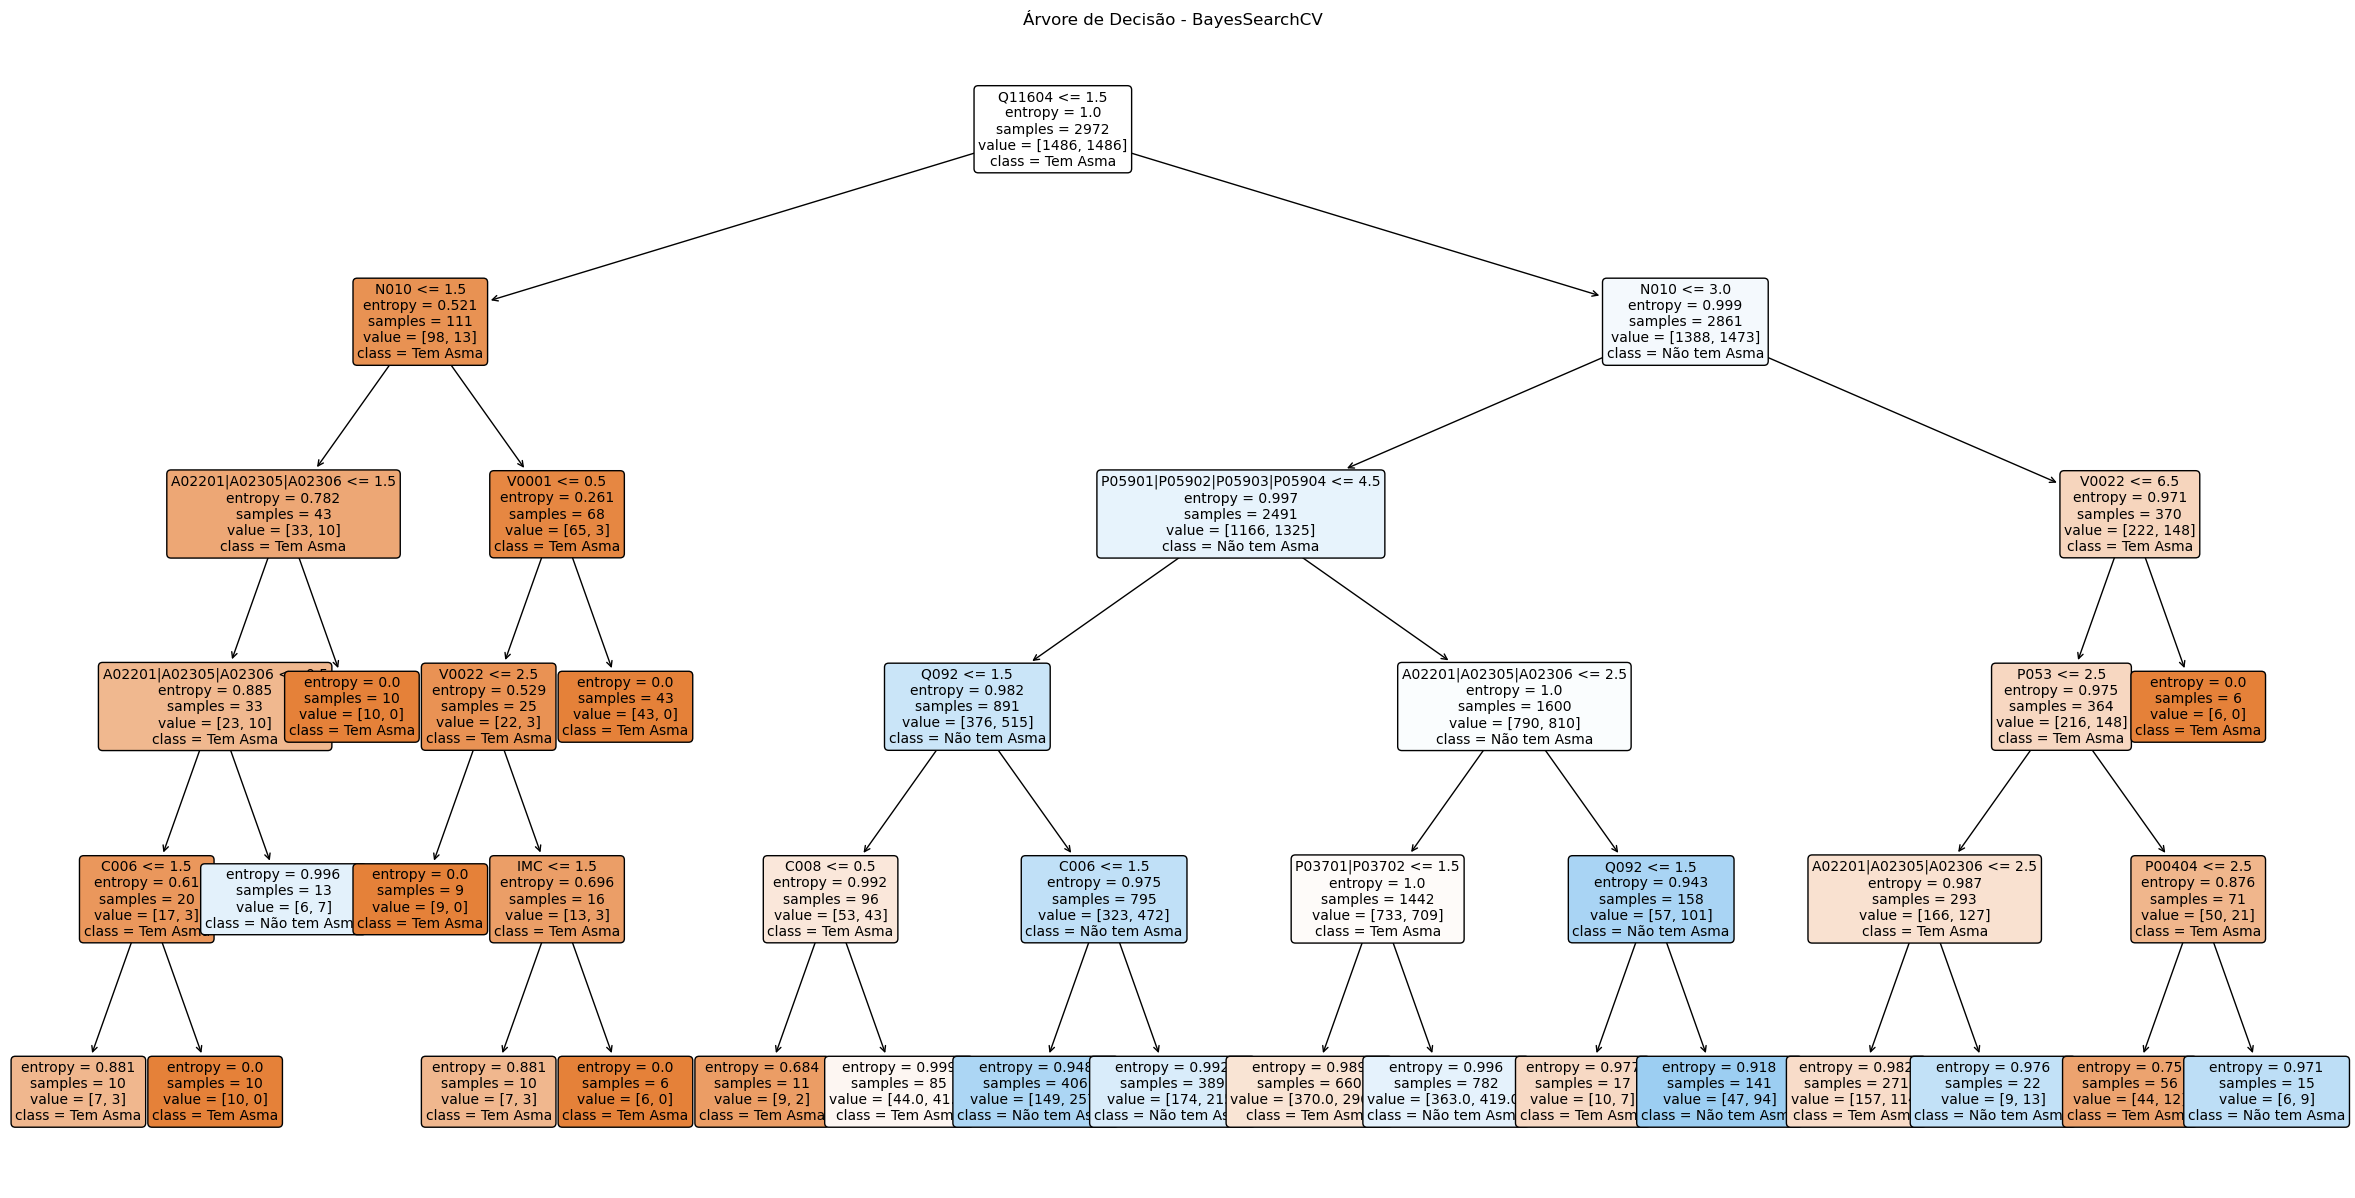

In [ ]:
best_model_bayes = bayes_search.best_estimator_
plot_decision_tree(best_model_bayes, feature_names, ['Tem Asma', 'Não tem Asma'], "Árvore de Decisão - BayesSearchCV")

In [ ]:
previsoes_bayes = best_model_bayes.predict(X_teste_rd_under)

In [ ]:
print(classification_report(y_teste_rd_under, previsoes_bayes))

              precision    recall  f1-score   support

           1       0.10      0.50      0.16       680
           2       0.95      0.66      0.78      9138

    accuracy                           0.65      9818
   macro avg       0.52      0.58      0.47      9818
weighted avg       0.89      0.65      0.74      9818



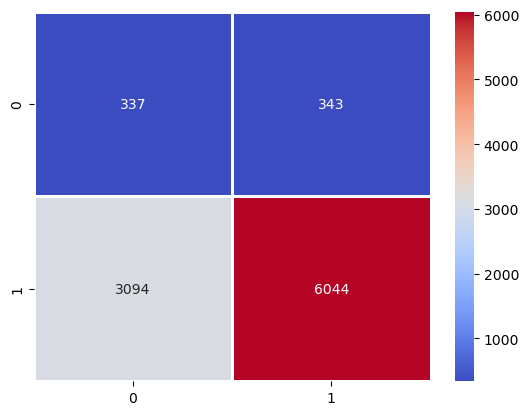

In [ ]:
cfm_matrix = confusion_matrix(y_teste_rd_under,previsoes_bayes)
sns.heatmap(cfm_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.show()

### DSTO

In [ ]:
bayes_search.fit(X_treino_DSTO, y_treino_DSTO)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(bayes_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(bayes_search.best_score_))


Melhores parâmetros encontrados com BayesSearchCV:
OrderedDict({'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 20})
Melhor pontuação de validação cruzada: 0.97


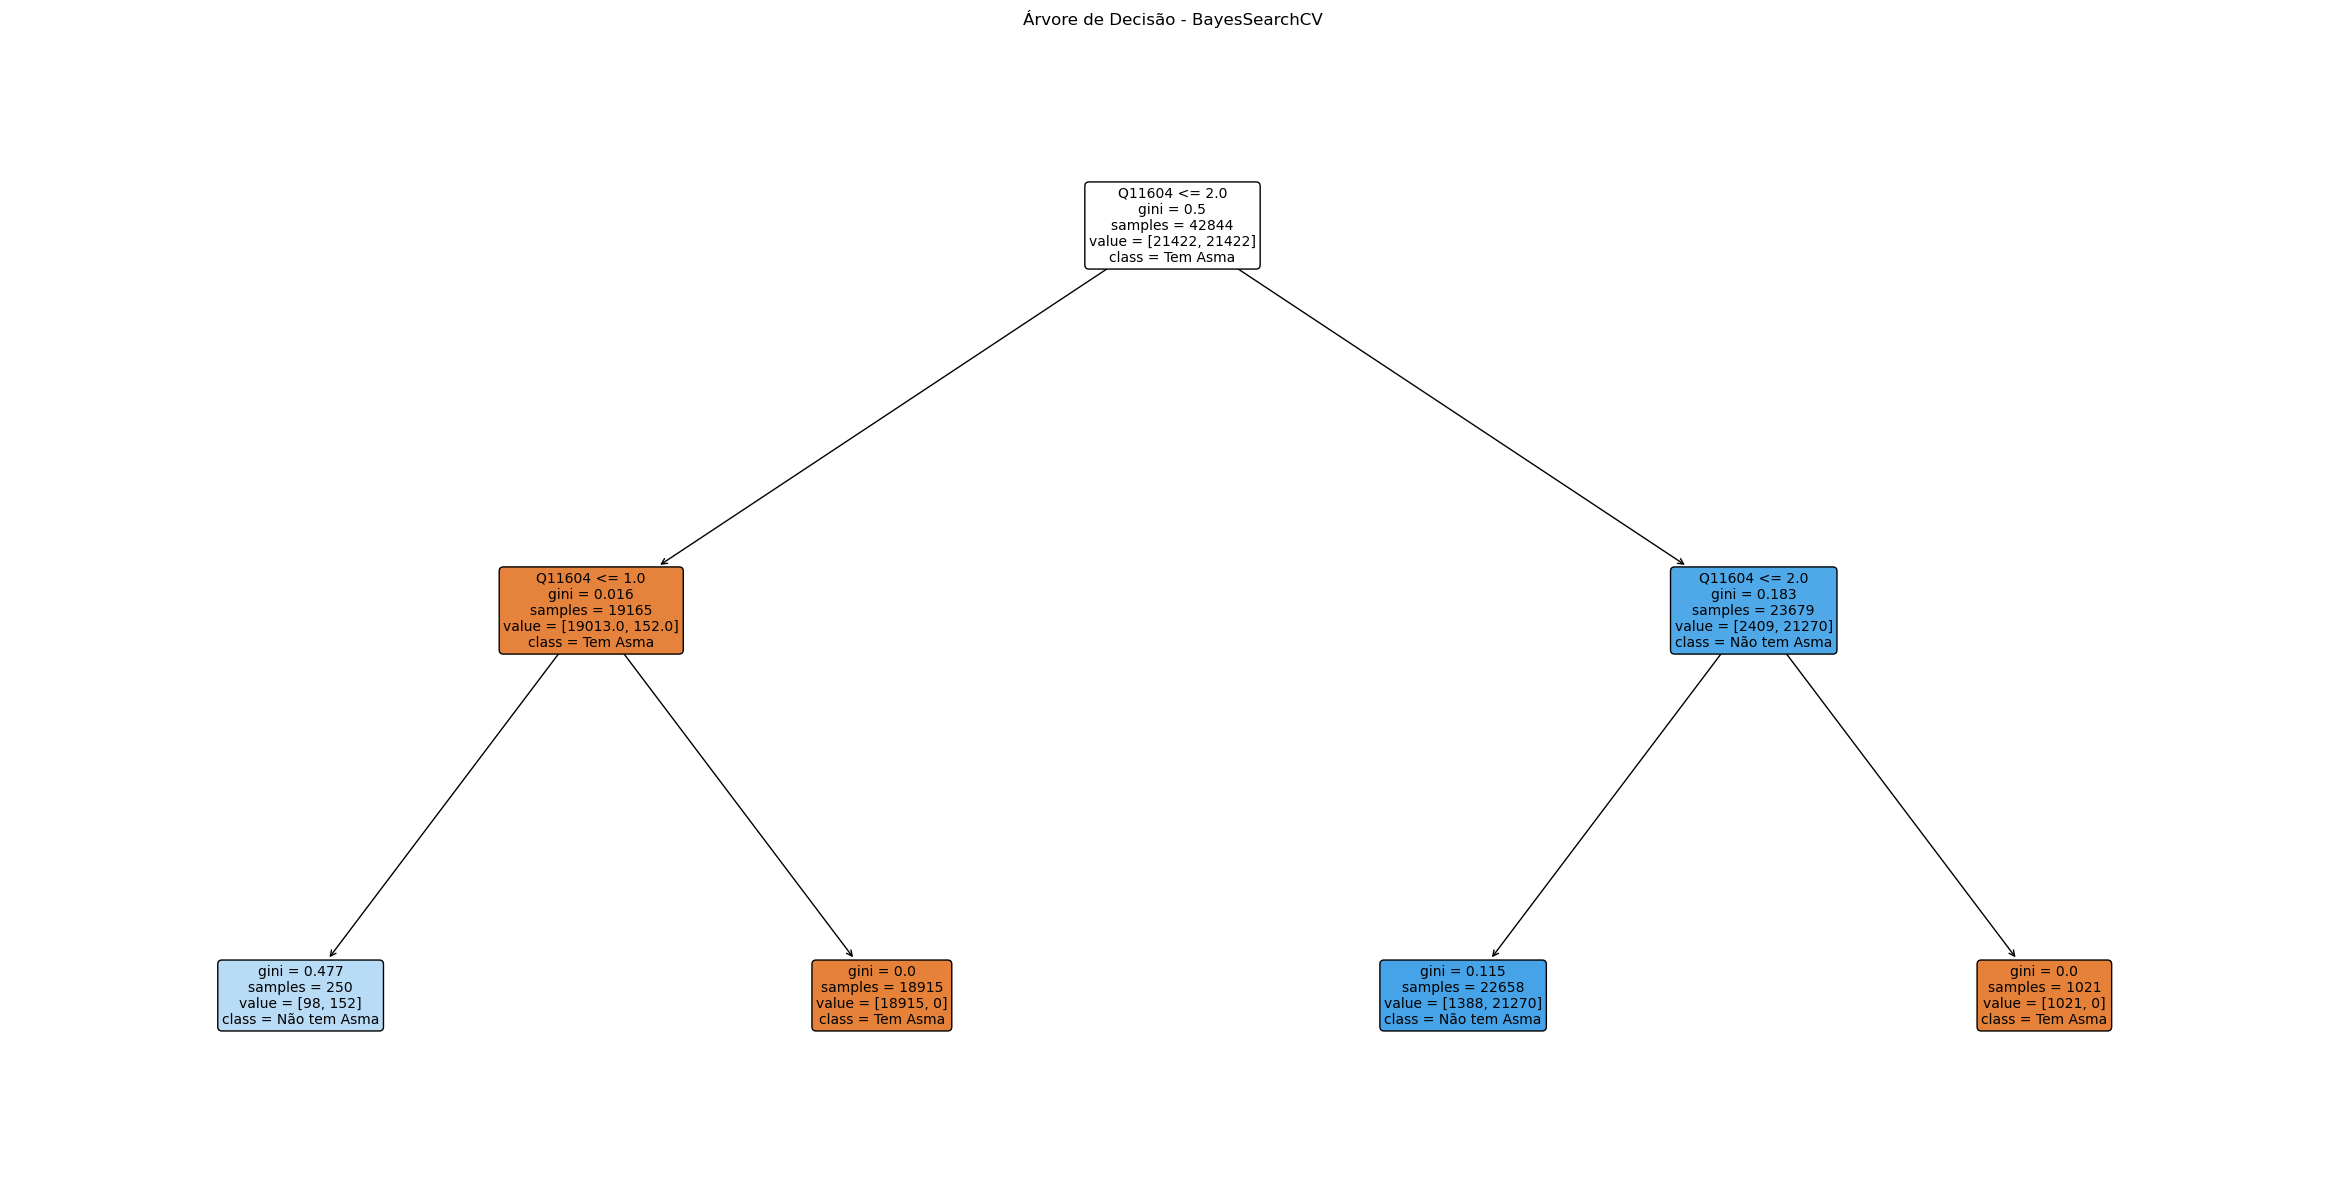

In [ ]:
best_model_bayes = bayes_search.best_estimator_
plot_decision_tree(best_model_bayes, feature_names, ['Tem Asma', 'Não tem Asma'], "Árvore de Decisão - BayesSearchCV")

In [ ]:
previsoes_bayes = best_model_bayes.predict(X_teste_DSTO)

In [ ]:
print(classification_report(y_teste_DSTO, previsoes_bayes))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       680
           2       0.93      1.00      0.96      9138

    accuracy                           0.93      9818
   macro avg       0.47      0.50      0.48      9818
weighted avg       0.87      0.93      0.90      9818



/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
